Implementations of the following numerical algorithms:

* Newton Raphson method
* Bisection method
* Fixed point method

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import log, exp

In [2]:
# Defining functions
# Question 1
def func1(x):
    return(2 * x **2 + 6 * x + 4)

def func1_2(x):
    return((-4 - 2 * x) / 6)

# Question 2
def func2(x):
    if type(x) != 'float' or type(x) != 'int':
        return(np.log(50 * x) + 2)
    else:
        return(log(50 * x + 2))

# Question 3
def func3(x):
    if type(x) != 'float' or type(x) != 'int':
        return(np.exp(x) - 5 * x + 2)
    else:
        return(exp(x) - 5 * x + 2)
    
# Question 4
def func4(x):
    return(x ** 3 + 2 * x ** 2 + 10 * x - 20)

In [4]:
class Counter:
    """Class to count iterations taken by each algorithm"""
    
    def __init__(self):
        self.iter = 0
    
    def count(self):
        self.iter += 1
    
    def get_count(self):
        return(self.iter)

# Define Methods
def bisection_method(func, left, right, counter):
    """
    Solves an equation numerically using bisection algorithm
    
    Arguments:
    func = function to solve
    left = left interval value
    right = right interval value
    counter = object of class Counter
    
    returns:
    root
    """
    counter.count()
    eps = 10 ** -5 # Tolerance
    middle = (left + right) / 2
    f_middle = func(middle)
    f_left = func(left)
    
    # Base case
    if abs(f_middle) <= eps:
        return middle
    
    elif f_middle * f_left < 0:
        return(bisection_method(func, left, middle, counter))
    else:
        return(bisection_method(func, middle, right, counter))


def fixed_point(func, guess, counter):
    """
    Solves an equation numerically using fixed point algorithm
    
    Arguments:
    func = function to solve
    guess
    counter = object of class Counter
    
    returns:
    root
    """
    counter.count()
    eps = 10 ** -5
    out = func(guess)
    if abs(guess - out) <= eps:
        return guess 
    else:
        return(fixed_point(func, out, counter))
    
def newton_method(func, func_deriv, guess, counter):
    """
    Solves an equation numerically using newton's method algorithm
    
    Arguments:
    func = function to solve
    func_deriv = function's derivative
    guess
    counter = object of class Counter
    
    returns:
    root
    """
    counter.count()
    eps = 10 ** -5
    x2 = guess - func(guess) / func_deriv(guess)
    
    if abs(x2 - guess) <= eps:
        return(guess)
    else:
        return(newton_method(func, func_deriv, x2, counter))

# Bisection method

In [5]:
counter = Counter()
print(f"Root: {bisection_method(func1, -3, -1.5, counter)}")
print("Iterations: ", counter.get_count())

Root: -2.0000038146972656
Iterations:  17


# Question 1
## Fixed-point method
$f(x) = 2x^2 + 6x + 4$<br>


$g(x) = x = \frac{-4 - 2x}{6}$

In [6]:
counter = Counter()
print(f"Root: {fixed_point(func1_2, -3, counter)}")
print("Iterations: ", counter.get_count())

Root: -0.5000047041910579
Iterations:  13


## Newton's method

In [7]:
def func1_deriv(x):
    return(4 * x + 6)
counter = Counter()
print(f"Root: {newton_method(func1, func1_deriv, -3, counter)}")
print("Iterations: ", counter.get_count())

Root: -2.0000000002328306
Iterations:  6


# Question 2
## New function

$let:$<br>
$g(x) = ln(50x) + 2$<br>


### Conditions


1. From the plot below, the function g(x) is continuous across the interval $[2,10]$<br>
2. ```check()``` function verifies that $g(x) \, \in \, [2,10] \, \forall \, x \, \in \, [2,10]$

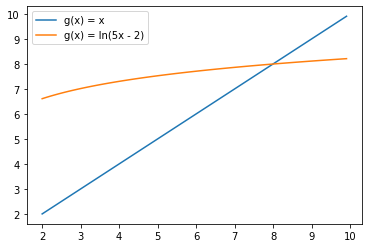

In [8]:
def func2(x):
    return(np.log(50 * x) + 2)
x = np.arange(2, 10, 0.1)
y = func2(x)
plt.plot(x, x, label='g(x) = x')
plt.plot(x, y, label='g(x) = ln(5x - 2)')
plt.legend()
plt.show()

In [9]:
def check(func, a, b):
    if func(a) >= a and func(b) <= b:
        return True
    else: 
        return False
    
check(func2, 2, 10)

True

In [10]:
counter = Counter()
print(f"Root: {fixed_point(func2, 6, counter)}")

Root: 7.990235365621497


# Question 3
## Bisection method

In [11]:
counter = Counter()
print(f"Root: {bisection_method(func3, 2, 3, counter)}")

Root: 2.1937408447265625


## Newton's-method

The root obtained by Newton's method was different, because $x_{guess} = 1 < x_{1} \simeq 0.88 < x_{2} \simeq 2.19$

In [12]:
counter = Counter()
def func3_deriv(x):
    if type(x) != 'float' or type(x) != 'int':
        return(np.exp(x) - 5)
    else:
        return(exp(x) - 5)
print(f"Root: {newton_method(func3, func3_deriv, 1, counter)}")

Root: 0.8842181386038656


# Question 4

In [13]:
print(f"Root: {bisection_method(func4, 0, 3, counter)}")

Root: 1.3688077926635742


# Visualizing the functions

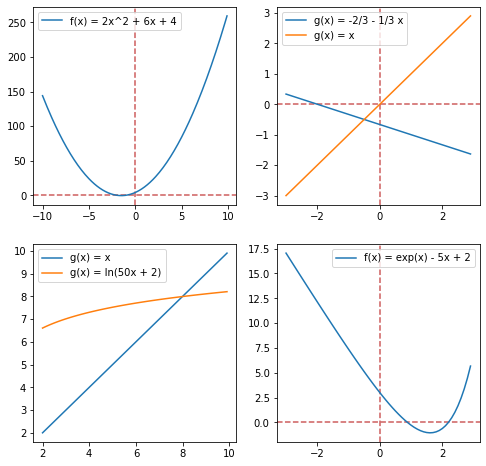

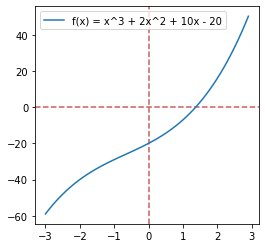

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))

x = np.arange(-10, 10, 0.1)
y = func1(x)
axs[0,0].axhline(y=0, color='indianred', linestyle='--')
axs[0,0].axvline(x=0, color='indianred', linestyle='--')
axs[0,0].plot(x, y, label='f(x) = 2x^2 + 6x + 4')
axs[0,0].legend()

x = np.arange(-3, 3, 0.1)
g_x = func1_2(x)
axs[0,1].axhline(y=0, color='indianred', linestyle='--')
axs[0,1].axvline(x=0, color='indianred', linestyle='--')
axs[0,1].plot(x, g_x, label='g(x) = -2/3 - 1/3 x')
axs[0,1].plot(x, x, label='g(x) = x')
axs[0,1].legend()
    
x = np.arange(2, 10, 0.1)
y = func2(x)
axs[1,0].plot(x, x, label='g(x) = x')
axs[1,0].plot(x, y, label='g(x) = ln(50x + 2)')
axs[1,0].legend()

x = np.arange(-3, 3, 0.1)
y = func3(x) 
axs[1,1].axhline(y=0, color='indianred', linestyle='--')
axs[1,1].axvline(x=0, color='indianred', linestyle='--')
axs[1,1].plot(x, y, label='f(x) = exp(x) - 5x + 2')
axs[1,1].legend()
plt.show()

fig, ax = plt.subplots(figsize=(4,4))
x = np.arange(-3, 3, 0.1)
y = func4(x) 
ax.axhline(y=0, color='indianred', linestyle='--')
ax.axvline(x=0, color='indianred', linestyle='--')
ax.plot(x, y, label='f(x) = x^3 + 2x^2 + 10x - 20')
ax.legend()
plt.show()